<a href="https://colab.research.google.com/github/applejin0105/DAP_FINAL_PROJECT/blob/main/DAP_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# DAP_FINAL_PROJECT

##### 총 250판을 플레이, 플레이한 결과를 다음과 같이 기입하였다.

In [ ]:
original_df = pd.read_csv('DAP_PROJECT.csv')
original_df

,Type,Generation,Group,Result,Count,Death,Kill
0,A,1,A,Win,1,2,4
1,A,1,A,Win,2,1,4
2,A,1,A,Win,3,2,4
3,A,1,A,Lose,4,4,1
4,A,1,A,Win,5,2,4
...,...,...,...,...,...,...,...
235,C,2,C,Win,6,2,4
236,C,2,C,Win,7,1,4
237,C,2,C,Lose,8,4,2
238,C,2,C,Win,9,1,4


# Data preprocessing

##### 추출한 데이터 중, 승률 계산을 위해, 승리 / 패배를 label로 Encode 하였다.

In [ ]:
df = pd.get_dummies(original_df, prefix=['rate'], columns=['Result'])
df

,Type,Generation,Group,Count,Death,Kill,rate_Lose,rate_Win
0,A,1,A,1,2,4,0,1
1,A,1,A,2,1,4,0,1
2,A,1,A,3,2,4,0,1
3,A,1,A,4,4,1,1,0
4,A,1,A,5,2,4,0,1
...,...,...,...,...,...,...,...,...
235,C,2,C,6,2,4,0,1
236,C,2,C,7,1,4,0,1
237,C,2,C,8,4,2,1,0
238,C,2,C,9,1,4,0,1


## Divide Group

###### 주어진 데이터를 그룹화하여, 각 분기별 / 세대별로 데이터를 구분하였다.

In [ ]:
Type_A = df['Type'] == 'A'
Type_B = df['Type'] == 'B'
Type_C = df['Type'] == 'C'

Group_A = df['Group'] == 'A'
Group_B = df['Group'] == 'B'
Group_C = df['Group'] == 'C'
Group_D = df['Group'] == 'D'
Group_E = df['Group'] == 'E'

Generation1 = df['Generation'] == 1
Generation2 = df['Generation'] == 2

AA1 = df[Type_A & Group_A & Generation1]
AB1 = df[Type_A & Group_B & Generation1]
AC1 = df[Type_A & Group_C & Generation1]
AD1 = df[Type_A & Group_D & Generation1]
AE1 = df[Type_A & Group_E & Generation1]

AA2 = df[Type_A & Group_A & Generation2]
AB2 = df[Type_A & Group_B & Generation2]

BA1 = df[Type_B & Group_A & Generation1]
BB1 = df[Type_B & Group_B & Generation1]
BC1 = df[Type_B & Group_C & Generation1]
BD1 = df[Type_B & Group_D & Generation1]
BE1 = df[Type_B & Group_E & Generation1]

BA2 = df[Type_B & Group_A & Generation2]
BB2 = df[Type_B & Group_B & Generation2]
BC2 = df[Type_B & Group_C & Generation2]
BD2 = df[Type_B & Group_D & Generation2]

CA1 = df[Type_C & Group_A & Generation1]
CB1 = df[Type_C & Group_B & Generation1]
CC1 = df[Type_C & Group_C & Generation1]
CD1 = df[Type_C & Group_D & Generation1]
CE1 = df[Type_C & Group_E & Generation1]

CA2 = df[Type_C & Group_A & Generation2]
CB2 = df[Type_C & Group_B & Generation2]
CC2 = df[Type_C & Group_C & Generation2]

# Data Visualizartion

## Win Rate / FIRST GENERATION

##### 첫번째 세대의 승률

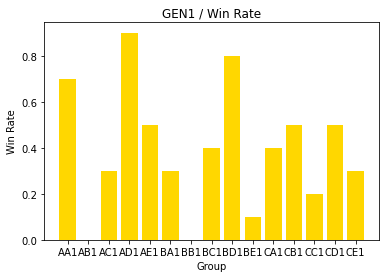

In [ ]:
plt.bar(['AA1', 'AB1', 'AC1', 'AD1', 'AE1', 'BA1', 'BB1', 'BC1', 'BD1', 'BE1', 'CA1', 'CB1', 'CC1', 'CD1', 'CE1'], [AA1['rate_Win'].mean(), AB1['rate_Win'].mean(), AC1['rate_Win'].mean(), AD1['rate_Win'].mean(), AE1['rate_Win'].mean(), BA1['rate_Win'].mean(), BB1['rate_Win'].mean(), BC1['rate_Win'].mean(), BD1['rate_Win'].mean(), BE1['rate_Win'].mean(), CA1['rate_Win'].mean(), CB1['rate_Win'].mean(), CC1['rate_Win'].mean(), CD1['rate_Win'].mean(), CE1['rate_Win'].mean()], color = 'gold')
plt.xlabel('Group')
plt.ylabel('Win Rate')
plt.title('GEN1 / Win Rate')
plt.show()

## AVG DEATH & KILL / FIRST GENERATION

##### 첫번째 세대의 평균 처치 / 사망 수

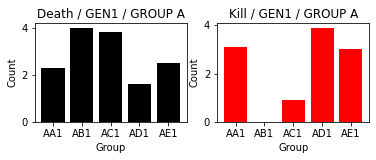

In [ ]:
plt.subplot(221)
plt.bar(['AA1', 'AB1', 'AC1', 'AD1', 'AE1'], [AA1['Death'].mean(), AB1['Death'].mean(), AC1['Death'].mean(), AD1['Death'].mean(), AE1['Death'].mean()], color = 'black')
plt.xlabel('Group')
plt.ylabel('Count')
plt.title('Death / GEN1 / GROUP A')

plt.subplot(222)
plt.bar(['AA1', 'AB1', 'AC1', 'AD1', 'AE1'], [AA1['Kill'].mean(), AB1['Kill'].mean(), AC1['Kill'].mean(), AD1['Kill'].mean(), AE1['Kill'].mean()], color = 'red')
plt.xlabel('Group')
plt.ylabel('Count')
plt.title('Kill / GEN1 / GROUP A')

plt.show()

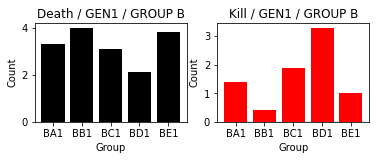

In [ ]:
plt.subplot(221)
plt.bar(['BA1', 'BB1', 'BC1', 'BD1', 'BE1'], [BA1['Death'].mean(), BB1['Death'].mean(), BC1['Death'].mean(), BD1['Death'].mean(), BE1['Death'].mean()], color = 'black')
plt.xlabel('Group')
plt.ylabel('Count')
plt.title('Death / GEN1 / GROUP B')

plt.subplot(222)
plt.bar(['BA1', 'BB1', 'BC1', 'BD1', 'BE1'], [BA1['Kill'].mean(), BB1['Kill'].mean(), BC1['Kill'].mean(), BD1['Kill'].mean(), BE1['Kill'].mean()], color = 'red')
plt.xlabel('Group')
plt.ylabel('Count')
plt.title('Kill / GEN1 / GROUP B')

plt.show()

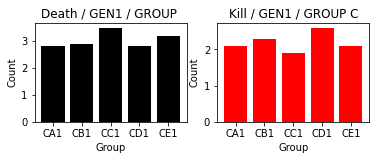

In [ ]:
plt.subplot(221)
plt.bar(['CA1', 'CB1', 'CC1', 'CD1', 'CE1'], [CA1['Death'].mean(), CB1['Death'].mean(), CC1['Death'].mean(), CD1['Death'].mean(), CE1['Death'].mean()], color = 'black')
plt.xlabel('Group')
plt.ylabel('Count')
plt.title('Death / GEN1 / GROUP ')

plt.subplot(222)
plt.bar(['CA1', 'CB1', 'CC1', 'CD1', 'CE1'], [CA1['Kill'].mean(), CB1['Kill'].mean(), CC1['Kill'].mean(), CD1['Kill'].mean(), CE1['Kill'].mean()], color = 'red')
plt.xlabel('Group')
plt.ylabel('Count')
plt.title('Kill / GEN1 / GROUP C')

plt.show()

## Win Rate / Second GENERATION

##### 두번째 세대의 승률

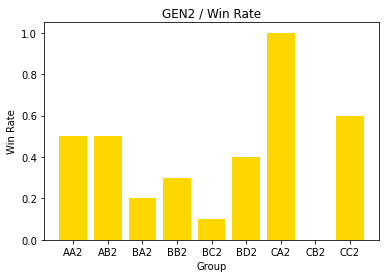

In [ ]:
plt.bar(['AA2', 'AB2', 'BA2', 'BB2', 'BC2', 'BD2', 'CA2', 'CB2', 'CC2'], [AA2['rate_Win'].mean(), AB2['rate_Win'].mean(), BA2['rate_Win'].mean(), BB2['rate_Win'].mean(), BC2['rate_Win'].mean(), BD2['rate_Win'].mean(), CA2['rate_Win'].mean(), CB2['rate_Win'].mean(), CC2['rate_Win'].mean()], color = 'gold')
plt.xlabel('Group')
plt.ylabel('Win Rate')
plt.title('GEN2 / Win Rate')
plt.show()

## AVG DEATH & KILL / Second GENERATION

##### 두번째 세대의 평균 처치 / 사망 수

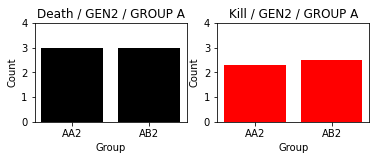

In [ ]:
plt.subplot(221)
plt.bar(['AA2', 'AB2'], [AA2['Death'].mean(), AB2['Death'].mean()], color = 'black')
plt.xlabel('Group')
plt.ylabel('Count')
plt.title('Death / GEN2 / GROUP A')
plt.ylim([0, 4])


plt.subplot(222)
plt.bar(['AA2', 'AB2'], [AA2['Kill'].mean(), AB2['Kill'].mean()], color = 'red')
plt.xlabel('Group')
plt.ylabel('Count')
plt.title('Kill / GEN2 / GROUP A')
plt.ylim([0, 4])

plt.show()

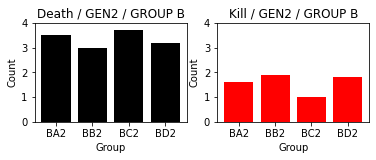

In [ ]:
plt.subplot(221)
plt.bar(['BA2', 'BB2', 'BC2', 'BD2'], [BA2['Death'].mean(), BB2['Death'].mean(), BC2['Death'].mean(), BD2['Death'].mean()], color = 'black')
plt.xlabel('Group')
plt.ylabel('Count')
plt.title('Death / GEN2 / GROUP B')
plt.ylim([0, 4])

plt.subplot(222)
plt.bar(['BA2', 'BB2', 'BC2', 'BD2'], [BA2['Kill'].mean(), BB2['Kill'].mean(), BC2['Kill'].mean(), BD2['Kill'].mean()], color = 'red')
plt.xlabel('Group')
plt.ylabel('Count')
plt.title('Kill / GEN2 / GROUP B')
plt.ylim([0, 4])
                         
plt.show()

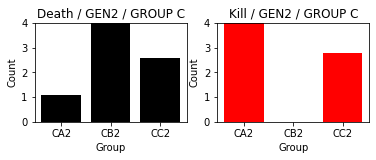

In [ ]:
plt.subplot(221)
plt.bar(['CA2', 'CB2', 'CC2'], [CA2['Death'].mean(), CB2['Death'].mean(), CC2['Death'].mean()], color = 'black')
plt.xlabel('Group')
plt.ylabel('Count')
plt.title('Death / GEN2 / GROUP C')
plt.ylim([0, 4])

plt.subplot(222)
plt.bar(['CA2', 'CB2', 'CC2'], [CA2['Kill'].mean(), CB2['Kill'].mean(), CC2['Kill'].mean()], color = 'red')
plt.xlabel('Group')
plt.ylabel('Count')
plt.title('Kill / GEN2 / GROUP C')
plt.ylim([0, 4])

plt.show()

## Compare Win Rate

##### 1세대와 2세대의 승률 비교 그래프

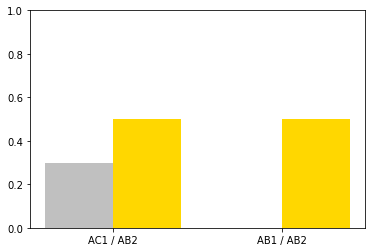

In [ ]:
topics = ['AC1 / AB2', 'AB1 / AB2']
value_a = [AC1['rate_Win'].mean(), AB1['rate_Win'].mean()]
value_b = [AA2['rate_Win'].mean(), AB2['rate_Win'].mean()]

def create_x(t, w, n, d):
    return [t*x + w*n for x in range(d)]

value_a_x = create_x(2, 0.8, 1, 2)
value_b_x = create_x(2, 0.8, 2, 2)

ax = plt.subplot()

ax.bar(value_a_x, value_a, color = 'silver')
ax.bar(value_b_x, value_b, color = 'gold')

middle_x = [(a+b)/2 for (a,b) in zip(value_a_x, value_b_x)]

ax.set_xticks(middle_x)
ax.set_xticklabels(topics)
plt.ylim([0, 1])
plt.show()

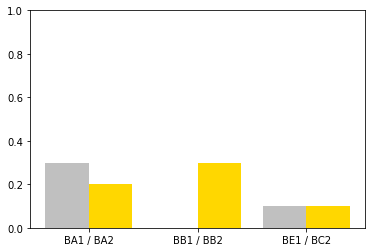

In [ ]:
topics = ['BA1 / BA2','BB1 / BB2', 'BE1 / BC2']
value_a = [BA1['rate_Win'].mean(), BB1['rate_Win'].mean(), BE1['rate_Win'].mean()]
value_b = [BA2['rate_Win'].mean(), BB2['rate_Win'].mean(), BC2['rate_Win'].mean()]

def create_x(t, w, n, d):
    return [t*x + w*n for x in range(d)]

value_a_x = create_x(2, 0.8, 1, 3)
value_b_x = create_x(2, 0.8, 2, 3)

ax = plt.subplot()

ax.bar(value_a_x, value_a, color = 'silver')
ax.bar(value_b_x, value_b, color = 'gold')

middle_x = [(a+b)/2 for (a,b) in zip(value_a_x, value_b_x)]

ax.set_xticks(middle_x)
ax.set_xticklabels(topics)
plt.ylim([0, 1])
plt.show()

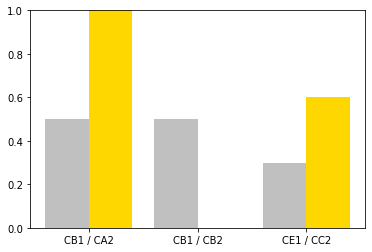

In [ ]:
topics = ['CB1 / CA2','CB1 / CB2','CE1 / CC2']
value_a = [CB1['rate_Win'].mean(), CB1['rate_Win'].mean(), CE1['rate_Win'].mean()]
value_b = [CA2['rate_Win'].mean(), CB2['rate_Win'].mean(), CC2['rate_Win'].mean()]

def create_x(t, w, n, d):
    return [t*x + w*n for x in range(d)]

value_a_x = create_x(2, 0.8, 1, 3)
value_b_x = create_x(2, 0.8, 2, 3)

ax = plt.subplot()

ax.bar(value_a_x, value_a, color = 'silver')
ax.bar(value_b_x, value_b, color = 'gold')

middle_x = [(a+b)/2 for (a,b) in zip(value_a_x, value_b_x)]

ax.set_xticks(middle_x)
ax.set_xticklabels(topics)
plt.ylim([0, 1])
plt.show()

## Compare Death & Kill Rate

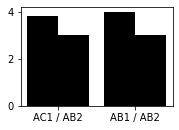

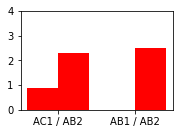

In [ ]:
topics = ['AC1 / AB2', 'AB1 / AB2']
value_a = [AC1['Death'].mean(), AB1['Death'].mean()]
value_b = [AA2['Death'].mean(), AB2['Death'].mean()]

def create_x(t, w, n, d):
    return [t*x + w*n for x in range(d)]

value_a_x = create_x(2, 0.8, 1, 2)
value_b_x = create_x(2, 0.8, 2, 2)

ax = plt.subplot(221)

ax.bar(value_a_x, value_a, color = 'black')
ax.bar(value_b_x, value_b, color = 'black')

middle_x = [(a+b)/2 for (a,b) in zip(value_a_x, value_b_x)]

ax.set_xticks(middle_x)
ax.set_xticklabels(topics)
plt.show()

topics = ['AC1 / AB2', 'AB1 / AB2']
value_a = [AC1['Kill'].mean(), AB1['Kill'].mean()]
value_b = [AA2['Kill'].mean(), AB2['Kill'].mean()]

value_a_x = create_x(2, 0.8, 1, 2)
value_b_x = create_x(2, 0.8, 2, 2)

ax = plt.subplot(222)

ax.bar(value_a_x, value_a, color = 'red')
ax.bar(value_b_x, value_b, color = 'red')
plt.ylim([0, 4])

middle_x = [(a+b)/2 for (a,b) in zip(value_a_x, value_b_x)]

ax.set_xticks(middle_x)
ax.set_xticklabels(topics)
plt.show()

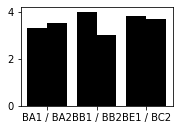

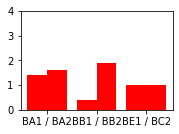

In [ ]:
topics = ['BA1 / BA2', 'BB1 / BB2', 'BE1 / BC2']
value_a = [BA1['Death'].mean(), BB1['Death'].mean(), BE1['Death'].mean()]
value_b = [BA2['Death'].mean(), BB2['Death'].mean(), BC2['Death'].mean()]

def create_x(t, w, n, d):
    return [t*x + w*n for x in range(d)]

value_a_x = create_x(2, 0.8, 1, 3)
value_b_x = create_x(2, 0.8, 2, 3)

ax = plt.subplot(221)

ax.bar(value_a_x, value_a, color = 'black')
ax.bar(value_b_x, value_b, color = 'black')

middle_x = [(a+b)/2 for (a,b) in zip(value_a_x, value_b_x)]

ax.set_xticks(middle_x)
ax.set_xticklabels(topics)
plt.show()

topics = ['BA1 / BA2', 'BB1 / BB2', 'BE1 / BC2']
value_a = [BA1['Kill'].mean(), BB1['Kill'].mean(), BE1['Kill'].mean()]
value_b = [BA2['Kill'].mean(), BB2['Kill'].mean(), BC2['Kill'].mean()]

value_a_x = create_x(2, 0.8, 1, 3)
value_b_x = create_x(2, 0.8, 2, 3)


ax = plt.subplot(222)

ax.bar(value_a_x, value_a, color = 'red')
ax.bar(value_b_x, value_b, color = 'red')
plt.ylim([0, 4])

middle_x = [(a+b)/2 for (a,b) in zip(value_a_x, value_b_x)]

ax.set_xticks(middle_x)
ax.set_xticklabels(topics)
plt.show()

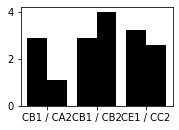

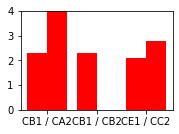

In [ ]:
topics = ['CB1 / CA2','CB1 / CB2','CE1 / CC2']
value_a = [CB1['Death'].mean(), CB1['Death'].mean(), CE1['Death'].mean()]
value_b = [CA2['Death'].mean(), CB2['Death'].mean(), CC2['Death'].mean()]

def create_x(t, w, n, d):
    return [t*x + w*n for x in range(d)]

value_a_x = create_x(2, 0.8, 1, 3)
value_b_x = create_x(2, 0.8, 2, 3)

ax = plt.subplot(221)

ax.bar(value_a_x, value_a, color = 'black')
ax.bar(value_b_x, value_b, color = 'black')

middle_x = [(a+b)/2 for (a,b) in zip(value_a_x, value_b_x)]

ax.set_xticks(middle_x)
ax.set_xticklabels(topics)
plt.show()

topics = ['CB1 / CA2','CB1 / CB2','CE1 / CC2']
value_a = [CB1['Kill'].mean(), CB1['Kill'].mean(), CE1['Kill'].mean()]
value_b = [CA2['Kill'].mean(), CB2['Kill'].mean(), CC2['Kill'].mean()]

value_a_x = create_x(2, 0.8, 1, 3)
value_b_x = create_x(2, 0.8, 2, 3)


ax = plt.subplot(222)

ax.bar(value_a_x, value_a, color = 'red')
ax.bar(value_b_x, value_b, color = 'red')
plt.ylim([0, 4])

middle_x = [(a+b)/2 for (a,b) in zip(value_a_x, value_b_x)]

ax.set_xticks(middle_x)
ax.set_xticklabels(topics)
plt.show()

##### 상기 데이터들을 정리해본다면, 승률이 낮은 Group들이 승률의 높은 Group과 Mating하게 되면 전체적으로 승률이 상승하고, 평균 처치수는 증가, 평균 사망수는 감소하는 것을 볼 수 있다. 
##### 즉, 반대로 말하면 승률이 높은 그룹은 그만큼 부정적인 효과를 보았다는 뜻이다.
##### 원래 데이터 추출의 목적이었던 승률 50%맞추기에 한 발자국 더 다가간 것을 확인할 수 있다.

# Machine Learning

## Regression

In [ ]:
data = {'GEN1': [AC1['rate_Win'].mean(), AB1['rate_Win'].mean(), BA1['rate_Win'].mean(), BB1['rate_Win'].mean(), BE1['rate_Win'].mean(), CB1['rate_Win'].mean(), CB1['rate_Win'].mean(), CE1['rate_Win'].mean()],
        'GEN2': [AA2['rate_Win'].mean(), AB2['rate_Win'].mean(), BA2['rate_Win'].mean(), BB2['rate_Win'].mean(), BC2['rate_Win'].mean(), CA2['rate_Win'].mean(), CB2['rate_Win'].mean(), CC2['rate_Win'].mean()]
       }
df = pd.DataFrame(data)
df

,GEN1,GEN2
0,0.3,0.5
1,0.0,0.5
2,0.3,0.2
3,0.0,0.3
4,0.1,0.1
5,0.5,1.0
6,0.5,0.0
7,0.3,0.6


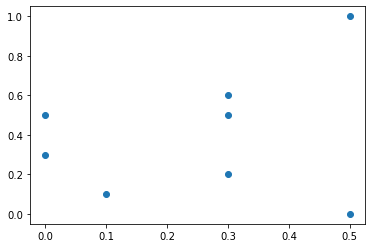

In [ ]:
X = df["GEN1"]
y = df["GEN2"]
plt.plot(X, y, 'o')
plt.show()

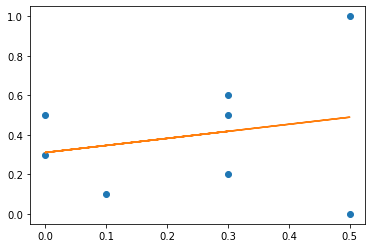

In [ ]:
line_filtter = LinearRegression()
line_filtter.fit(X.values.reshape(-1,1), y)

plt.plot(X, y, 'o')
plt.plot(X,line_filtter.predict(X.values.reshape(-1,1)))
plt.show()

##### 선형회귀를 살펴 본다면, 전반적인 승률이 상승하는 것을 확인 할 수 있다. 이를 바탕으로 승률이 낮은 Group과 높은 Group간의 Mating 결과를 예측할 수 있으며 이에 따라 게임의 벨런스를 맞추는 작업을 보다 쉽게 진행할 수 있게 되었다.